# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Краткое описание проекта
Выполнить предобработку данных, добавить новые столбцы, провести анализ данных, построить графики и сделать выводы. 

# Цель проекта
1. Изучить следующие параметры объектов:
    - `total_area` общая площадь;
    - `living_area` жилая площадь;
    - `kitchen_area` площадь кухни;
    - `last_price` цена объекта;
    - `rooms` количество комнат;
    - `ceiling_height` высота потолков;
    - `floor` этаж квартиры;
    - `type_floor` тип этажа квартиры («первый», «последний», «другой»), создадим данный столбец; 
    - `floors_total` общее количество этажей в доме;
    - `cityCenters_nearest` расстояние до центра города в метрах;
    - `airports_nearest` расстояние до ближайшего аэропорта;
    - `parks_nearest` расстояние до ближайшего парка;
    - `day_week_exposition` день недели и `month_exposition`месяц публикации объявления, создадим данные столбцы.
    
Построить отдельные гистограммы для каждого из этих параметров и описать все наблюдения.

2.	Изучить, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.
    - Построить гистограмму.
    - Посчитать среднее и медиану.

Описать, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

3.	Изучить какие факторы больше всего влияют на общую (полную) стоимость объекта, т.е. зависит ли цена от:
    - общей площади;
    - жилой площади;
    - площади кухни;
    - количества комнат;
    - этажа, на котором расположена квартира (первый, последний, другой);
    - даты размещения (день недели, месяц, год).
    
Построить графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией можем использовать сводные таблицы.

4.	Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.

5.	Выделить квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислить среднюю цену каждого километра до центра города. Описать, как стоимость объектов зависит от расстояния до центра города.

# Описание данных

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

# План работы
1. Импортировать библиотеку pandas и считать данные из csv-файла в датафрейм;
2. Сделать предобработку данных:
    - поиск пропусков, заполнение или удаление в случае необходимости;
    - поиск аномальных значений и удаление в случае необходимости;
    - проверка типов данных и изменение в случае необходимости;
    - поиск явных и неявных дубликатов и удаление в случае необходимости;
    - сделать категоризацию данных;
3. Добавить в таблицу новые столбцы;
4. Исследовать данные, построить графики, описать наблюдения и ответить на вопросы;
5. Сделать общий вывод.



### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеку pandas
import pandas as pd

In [2]:
# читаем файл  
data = pd.read_csv('../datasets/real_estate_data.csv', sep = '\t')

### Предобработка данных

In [3]:
# посмотрим 5 первых строк
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Количество колонок 22, столько и в описании данных

In [4]:
# посмотрим инофрмацию о столбцах 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# посмотрим инофрмацию о количественных столбцах 
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


1. Всего 23699 строк, но не во всех столбцах полные значения. Необходимо, проверить пропуски и заполнить или удалить при необходимости.  
2. Тип данных в `last_price`, `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` *float64*, хотя все данные целочисленные. Необходимо поменять тип данных на *int*.
3. Тип данных в `is_apartment` *object* должен быть *bool*. Проверить набор данных и поменять тип. 
4. Столбец `rooms` не может быть комнат 0. Проверить в чем причина и исправить при возможности или удалить. 
5. Столбец `first_day_exposition` имеет тип *object*, а должен *datatime*. Необходимо сделать изменения. 
6. Проверить аномальные значения во всех столбцах, кроме `total_images`, т.к. кол-во фото не используются в анализе, и ограничений на поле нет. 

In [6]:
# узнаем где у нас есть пропуски 
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Имеем с пропусками столбцы `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`,
       `locality_name`, `airports_nearest`, `cityCenters_nearest`,
       `parks_around3000`, `parks_nearest`, `ponds_around3000`,
       `ponds_nearest`, `days_exposition`.

In [7]:
# посмотри дубликаты
data.duplicated().sum()

0

Дубликатов нет в данных. 

Наччнем проверку заполненных столбцов, т.к. они будут использованы для заполнения пропусков в других столбцах. 
Как я уже писал выше `total_images` искать аномалии не будем, т.к. не используем для анализа и ограничений на кол-во фото нет. 

In [8]:
# разделим last_price для удобства визуализации
data['last_price'] = data['last_price'] / 1000000

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

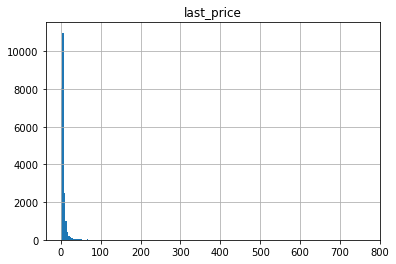

In [9]:
# рассмотрим распределение квартир по стоимости 'last_price'
data.hist('last_price', bins = 200)

Основная ценовая группа квартир находится от 3 до 7 млн. руб.  Рассмотрим группы от 20 млн и до 1,5 млн. 

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

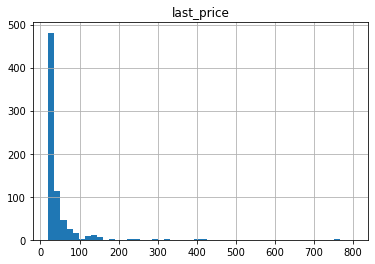

In [10]:
# выведим распределение квартир от 20 млн. 
data.hist('last_price', bins = 50, range = (20, 800))

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

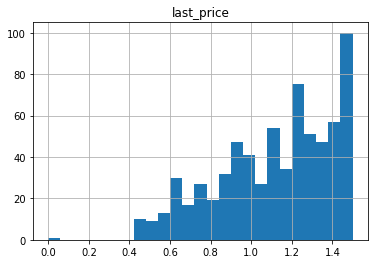

In [11]:
# выведим распределение квартир до 1.5 млн. 
data.hist('last_price', bins = 25, range = (0, 1.5))

По графикам видим, что крайне мало квартир до 0.6 млн руб. и свыше 100 млн руб. Данные выбросы стоимости квартир могут сильно повлиять на анализ, поэтому удалим строки с данными выбросами.

In [12]:
# создадим новый датафрейм data и отбросим выбросы по цене
data = data.query('0.6 < last_price &  last_price < 100')

In [13]:
# преобразуем в целочисленный тип данных
data['last_price'] = data['last_price'].astype(int)

In [14]:
# проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23618 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23618 non-null  int64  
 1   last_price            23618 non-null  int64  
 2   total_area            23618 non-null  float64
 3   first_day_exposition  23618 non-null  object 
 4   rooms                 23618 non-null  int64  
 5   ceiling_height        14464 non-null  float64
 6   floors_total          23532 non-null  float64
 7   living_area           21733 non-null  float64
 8   floor                 23618 non-null  int64  
 9   is_apartment          2769 non-null   object 
 10  studio                23618 non-null  bool   
 11  open_plan             23618 non-null  bool   
 12  kitchen_area          21360 non-null  float64
 13  balcony               12152 non-null  float64
 14  locality_name         23569 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

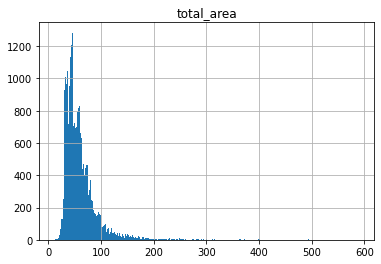

In [15]:
# рассмотрим распределение квартир по общей площади 'total_area'
data.hist('total_area', bins = 300)

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

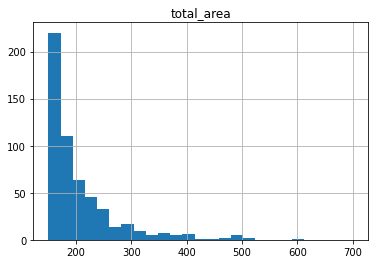

In [16]:
# рассмотрим распределение квартир по общей площади 'total_area' от 150
data.hist('total_area', bins = 25, range = (150, 700))

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

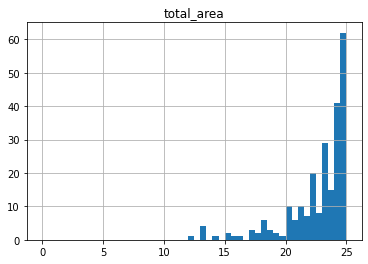

In [17]:
# рассмотрим распределение квартир по общей площади 'total_area' до 25 м2
data.hist('total_area', bins = 50, range = (0, 25))

Выбросами в столбце общая площадь считаю до 20 м2 и свыше 200 м2. Основная группа находится от 20 до 80 м2. 

In [18]:
# Удалим данные выбросы из нашего датафрейма
data = data.query('20 < total_area <= 200')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23387 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23387 non-null  int64  
 1   last_price            23387 non-null  int64  
 2   total_area            23387 non-null  float64
 3   first_day_exposition  23387 non-null  object 
 4   rooms                 23387 non-null  int64  
 5   ceiling_height        14321 non-null  float64
 6   floors_total          23302 non-null  float64
 7   living_area           21536 non-null  float64
 8   floor                 23387 non-null  int64  
 9   is_apartment          2745 non-null   object 
 10  studio                23387 non-null  bool   
 11  open_plan             23387 non-null  bool   
 12  kitchen_area          21180 non-null  float64
 13  balcony               12054 non-null  float64
 14  locality_name         23338 non-null  object 
 15  airports_nearest   

In [19]:
# изменим тип данных в столбце дате размещения 'first_day_exposition'
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [20]:
# проверим изменения 
data['first_day_exposition'].dtype.name

'datetime64[ns]'

array([[<AxesSubplot:title={'center':'first_day_exposition'}>]],
      dtype=object)

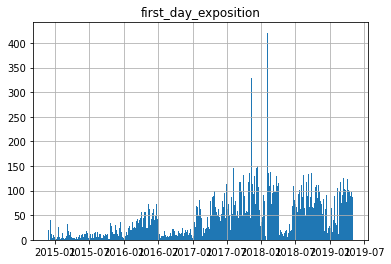

In [21]:
# рассмотрим распределение квартир по дате размещения 'first_day_exposition'
data.hist('first_day_exposition', bins = 500)

In [22]:
print(data['first_day_exposition'].min(), data['first_day_exposition'].max(), sep ='\n')

2014-11-27 00:00:00
2019-05-03 00:00:00


Выбросов по дате размещения `first_day_exposition` нет. Изменений по столбцу нет. 

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

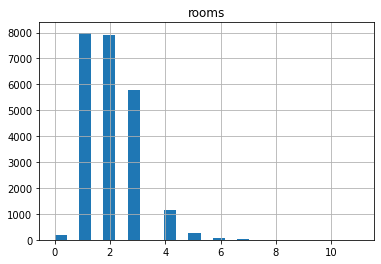

In [23]:
# рассмотрим распределение квартир по кол-ву комнат 'rooms'
data.hist('rooms', bins = 25)

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

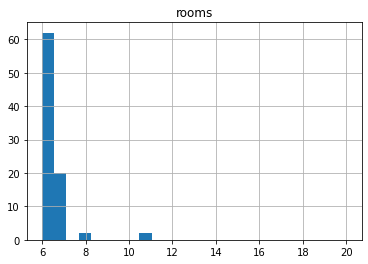

In [24]:
# рассмотрим распределение квартир по кол-ву комнат 'rooms' от 6 комнат
data.hist('rooms', bins = 25, range = (6, 20))

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

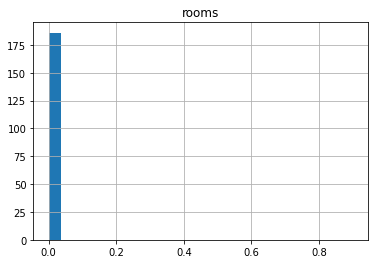

In [25]:
# рассмотрим распределение квартир по кол-ву комнат 'rooms' без комнат 
data.hist('rooms', bins = 25, range = (0, 0.9))

Основная группа 1 - 3 комнатные квартиры. Аномальные значения от 8 и квартиры без комнат. Удалить около 200 квартир не хочется, поэтому посмотрим распределение между комнатами и площадью. И на основе этого примем решение. 

In [26]:
# создадим сводную кол-ва квартир по общей площади
data[data['rooms'] != 0].pivot_table(index = 'rooms', values = 'total_area', aggfunc = ['median'])

,median
,total_area
rooms,
1,36.60
2,53.00
3,72.80
4,98.00
5,133.00
6,155.90
7,160.25
8,170.60


array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

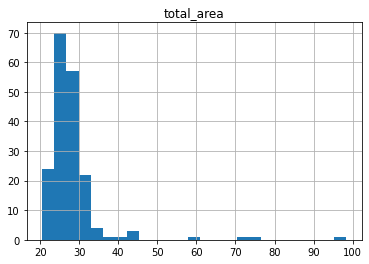

In [27]:
# рассмотрим распределение квартир без комнат по общей площади
data[data['rooms'] == 0].hist('total_area', bins = 25)

Медийное значение в однокомнатных квартирах 36.6 м2. Основная масса квартир без комнат до 35 м2. Поэтому присвоим квартирам без комнат 1 до 36.6 м2 общей площади, остальные удалим.


In [28]:
# заменил ноли на 1, где площадь менее 36.6 м2
data['rooms'] = data['rooms'].where(~((data['rooms'] == 0) & (data['total_area'] <= 36.6)), 1)
# удалим строки квартир без комнат:
data = data[data['rooms'] != 0]

In [29]:
# рассмотрим столбец высоты потолков 'ceiling_height'
data['ceiling_height'].describe()

count    14315.000000
mean         2.764032
std          1.265631
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Видим потолки 1 м и потолки 100 м. Что является аномальными значениями для высоты потолков.

In [30]:
# посмотрим информацию высоты потолков по этажности дома
data.pivot_table(index = 'floors_total', values = 'ceiling_height', aggfunc = ('min', 'max', 'mean', 'median', lambda x: (x.isna().sum())))

,<lambda_0>,max,mean,median,min
floors_total,,,,,
1.0,13.0,3.00,2.740000,2.80,2.30
2.0,156.0,27.00,3.014612,2.70,1.20
3.0,256.0,32.00,2.955405,2.80,2.50
4.0,391.0,27.00,2.981255,3.00,2.40
5.0,2083.0,100.00,2.783539,2.55,2.00
6.0,280.0,32.00,3.093390,3.00,2.40
7.0,190.0,4.50,2.910053,2.95,2.45
8.0,164.0,4.00,2.836854,2.80,2.40
9.0,1202.0,26.00,2.597023,2.55,2.00


array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

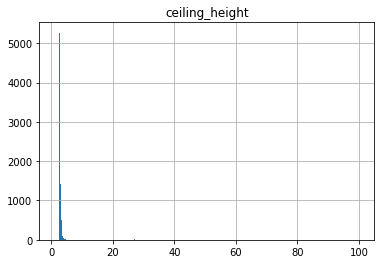

In [31]:
# посмотрим как распределены размеры потолков
data.hist('ceiling_height', bins = 500)

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

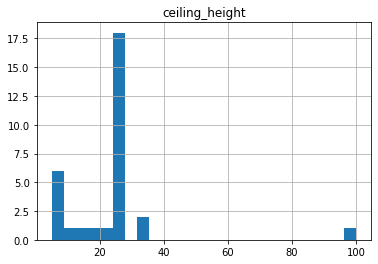

In [32]:
# посмотрим как распределены размеры потолков от 5 м. 5 м взял, т.к. в Санкт-Петербурге строили дома сполоками до 5 м
data.hist('ceiling_height', bins = 25, range = (5, 100))

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

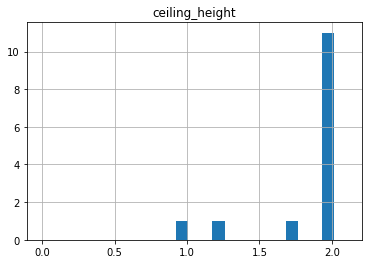

In [33]:
# посмотрим как распределены размеры потолков до 2.1 м (минимальная высота потолков для перемещений )
data.hist('ceiling_height', bins = 25, range = (0, 2.1))

In [34]:
# подсчитаем кол-во квартир с шагом 1 м
for ind in range(1,101):
    a=len(data.query('@ind <= ceiling_height < @ind+1'))
    if a != 0:
        print('Квартир с потолками от', ind, 'м. до', ind + 1, 'м. -', a)

Квартир с потолками от 1 м. до 2 м. - 3
Квартир с потолками от 2 м. до 3 м. - 11813
Квартир с потолками от 3 м. до 4 м. - 2407
Квартир с потолками от 4 м. до 5 м. - 61
Квартир с потолками от 5 м. до 6 м. - 2
Квартир с потолками от 8 м. до 9 м. - 4
Квартир с потолками от 10 м. до 11 м. - 1
Квартир с потолками от 14 м. до 15 м. - 1
Квартир с потолками от 20 м. до 21 м. - 1
Квартир с потолками от 22 м. до 23 м. - 1
Квартир с потолками от 24 м. до 25 м. - 1
Квартир с потолками от 25 м. до 26 м. - 7
Квартир с потолками от 26 м. до 27 м. - 1
Квартир с потолками от 27 м. до 28 м. - 9
Квартир с потолками от 32 м. до 33 м. - 2
Квартир с потолками от 100 м. до 101 м. - 1


Выводы по столбцу `ceiling_height` (высота потолков) можно сделать следующие:
1. Самая многочисленная группа квартиры от 2 до 4 м. 
2. Не надо списывать группу от 4 до 5 м, т.к. в Санкт-Петербурге строили такие дома;
3. С потолками до 2 м и 100 м, скорее всего ошибка.
4. От 5 до 10 м, скорее всего ошибка, возможно, что это двухуровневые квартиры;
5. От 10 до 20 м, скорее всего ошибка, возможно, что трехуровневые квартиры;
6. От 20 до 33 м, скорее всего ошибка, возможно, что указали в см, когда все в м;

План действий по столбцу:
1. Пустые заполним медианным значением от этажности дома;
2. Строки с потолками до 2.1 м и от 5 м. удалим из выборки;
3. Пункты 4, 5 и в данных изменять не буду, т.к. это только предположения
4. Пукнт 6 исправим. 


In [35]:
# 1. Пустые заполним медианным значением по этажности, потолки в 33 этажном заполним медийным 34 этажного дома  ;
for ind in data.query('ceiling_height.isna() and ~floors_total.isna()')['floors_total'].unique():
    if ind != 33:
        data.loc[(data['floors_total'] == ind) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == ind), 'ceiling_height'].median()
    else:
        data.loc[(data['floors_total'] == ind) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total'] == 34), 'ceiling_height'].median()

In [36]:
# разделим на 10 высоты потолков от 20 до 33
data.loc[((data['ceiling_height'] >= 20) & (data['ceiling_height'] <= 33)), 'ceiling_height'] = data['ceiling_height'] / 10

In [37]:
# удалим квартиры с потолками до 2 м и выше 5 м
data = data.query('2 <= ceiling_height < 5')

In [38]:
# проверим, что пустых ячеек нет
data['ceiling_height'].isna().sum()

0

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

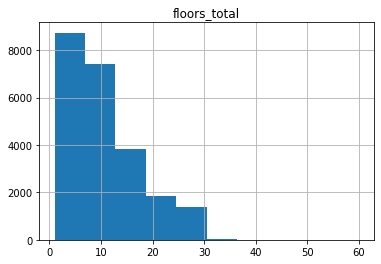

In [39]:
# посмотрим как распределены floors_total
data.hist('floors_total', bins = 10)

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

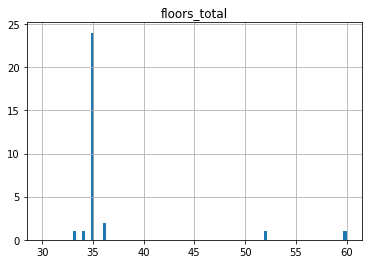

In [40]:
# посмотрим как распределены floors_total
data.hist('floors_total', bins = 100, range = (30, 60))

Этажи в доме от 1 до 60. Может показаться, что зданий нет выше 30, но такие здания есть, по крайней мере Ланта Центр. Возможно, стоит проверить реально такие объекты. Объекты с пустыми значениями заполнить не возможно, а т.к. этажность здания используется  в анализе и может привести к ошибкам, поэтому с пустыми значениями строки удалим. 

In [41]:
# Для правильности анализа уберем дома от 36 этажей. 
data = data.query('floors_total < 36')

In [42]:
# удалим строки с пустыми значениями в столбце 'floors_total'
data = data.dropna(subset=['floors_total'])

In [43]:
# проверим изменения
data['floors_total'].isna().sum()

0

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

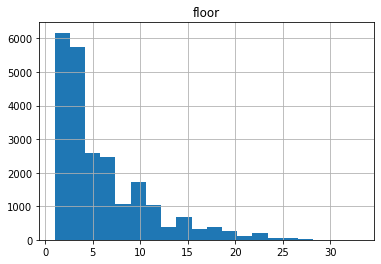

In [44]:
# посмотрим как распределены floor
data.hist('floor', bins = 20)

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

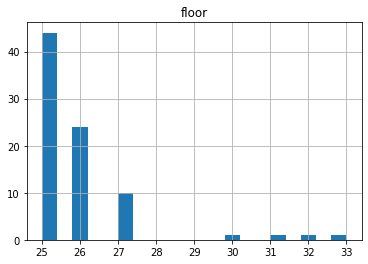

In [45]:
# посмотрим как распределены floor
data.hist('floor', bins = 20, range = (25, 33))

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

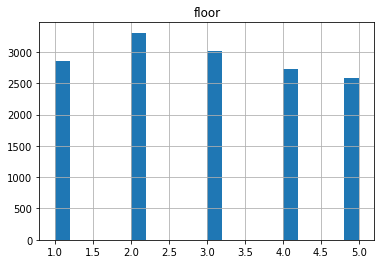

In [46]:
# посмотрим как распределены floor
data.hist('floor', bins = 20, range = (1, 5))

Основная группа квартир находится до 10 этажа вклбчительно. Могут показаться разбросами квартиры с 30 этажа и выше, но решил их оставить, т.к. уже ограничил этажность дома. 

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

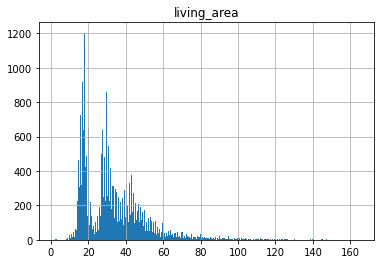

In [47]:
# посмотрим как распределены living_area
data.hist('living_area', bins = 300)

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

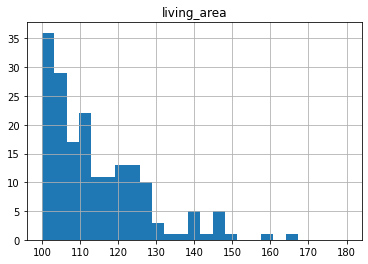

In [48]:
# посмотрим как распределены living_area
data.hist('living_area', bins = 25, range = (100, 180))

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

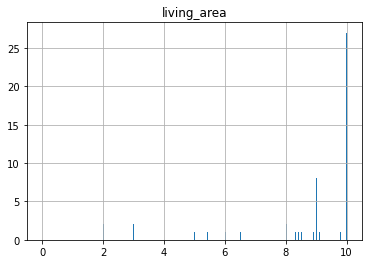

In [49]:
# посмотрим как распределены living_area
data.hist('living_area', bins = 300, range = (0, 10))

Есть вопросы к квартирам около до 10 м2 и больше 150 м2 (хотя такие квартиры уже не являются аномальным значением), но для правильности анализа удалим данные квартиры из выборки. 

In [50]:
# удалим квартиры с площадью до 10 м2 и больше 150 м2
data = data.query('10 < living_area < 150 or living_area.isna()')

In [51]:
data['living_area'].isna().sum()

1817

In [52]:
# заполним пустые значения жилая площадь равна общей площади умноженая на коэффициент отношения медиан жилой площади к общей
data['living_area'].describe()

count    21405.000000
mean        33.326027
std         17.265446
min         10.080000
25%         18.600000
50%         30.000000
75%         42.000000
max        147.200000
Name: living_area, dtype: float64

В столбце `living_area` остались пустые значения, заполнять не будем, т.к. может привест к ошибкам

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

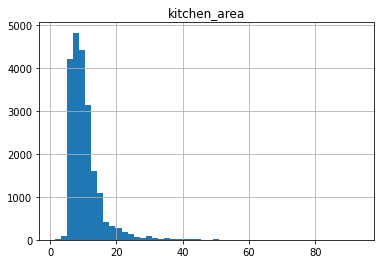

In [53]:
# посмотрим как распределены kitchen_area
data.hist('kitchen_area', bins = 50)               

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

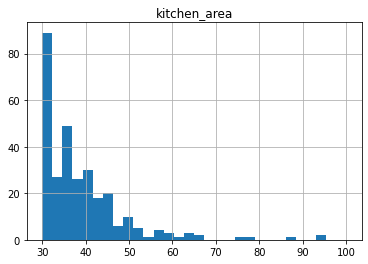

In [54]:
# посмотрим как распределены kitchen_area
data.hist('kitchen_area', bins = 30, range = (30, 100))               

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

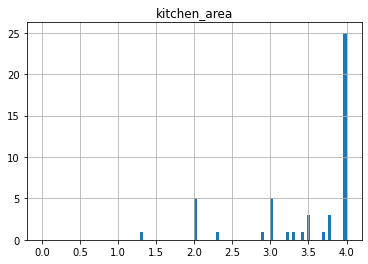

In [55]:
# посмотрим как распределены kitchen_area
data.hist('kitchen_area', bins = 100, range = (0, 4))               

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

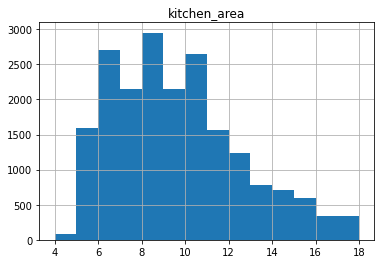

In [56]:
# посмотрим как распределены kitchen_area
data.hist('kitchen_area', bins = 14, range = (4, 18))               

In [57]:
# проверим изменения
data['kitchen_area'].isna().sum()

2139

Аномальных значений в столбце `kitchen_area` не видно. Основная группа от 5 до 16 м2. Остались пустые значения, т.к. замена может привести к ошибкам в анализе. 

In [58]:
# помотрим уникальные значени is_apartment
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [59]:
# Пустые значения в is_apartment скорее всего это нет, т.е. не является апартаментами, поэтому исправим все пустые на False
data['is_apartment'] = data['is_apartment'].fillna(False)

In [60]:
# проверим изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23222 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23222 non-null  int64         
 1   last_price            23222 non-null  int64         
 2   total_area            23222 non-null  float64       
 3   first_day_exposition  23222 non-null  datetime64[ns]
 4   rooms                 23222 non-null  int64         
 5   ceiling_height        23222 non-null  float64       
 6   floors_total          23222 non-null  float64       
 7   living_area           21405 non-null  float64       
 8   floor                 23222 non-null  int64         
 9   is_apartment          23222 non-null  bool          
 10  studio                23222 non-null  bool          
 11  open_plan             23222 non-null  bool          
 12  kitchen_area          21083 non-null  float64       
 13  balcony         

Заполнили все данные в столбце `is_apartment` и этим действием изменили тип данных. 

In [61]:
# посмотрим как распределены is_apartment
data.groupby('is_apartment')['is_apartment'].count()

is_apartment
False    23175
True        47
Name: is_apartment, dtype: int64

Основная группа не апартаменты. 

In [62]:
# посмотрим как распределены studio
data.groupby('studio')['studio'].count()

studio
False    23094
True       128
Name: studio, dtype: int64

Основная группа не студии. 

In [63]:
# посмотрим как распределены open_plan             
data.groupby('open_plan')['studio'].count()

open_plan
False    23159
True        63
Name: studio, dtype: int64

Основная группа не свободной планировки. 

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

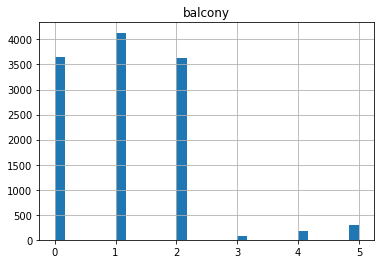

In [64]:
# посмотрим как распределены balcony
data.hist('balcony', bins = 30)               

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

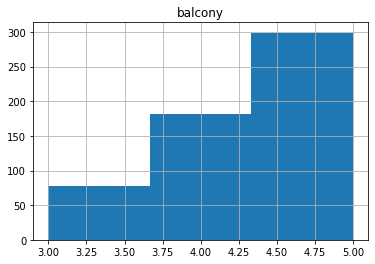

In [65]:
# посмотрим как распределены balcony
data.hist('balcony', bins = 3, range = (3, 5))               

Выборка балконов от 3 шт, кажется аномальной, но она большая, потому никаких изменений делать не буду. 

In [66]:
# по столбцу балконы 'balcony' пустые значения скорее всего отсутствие балкона, заменим пустые на 0
data['balcony'] = data['balcony'].fillna(0)

In [67]:
# проверим изменения
data['balcony'].isna().sum()

0

In [68]:
# Проверим написания типов насаеленных пунктов, они написаны с маленькой буквы 
phrase = []
for ind in data[~data['locality_name'].isna()]['locality_name'].unique().tolist():
    #print(ind)
    words_lower = []
    for jnd in ind.split(' '):
        if jnd == jnd.lower():
            words_lower.append(jnd)
    if words_lower != [] and ' '.join(words_lower) not in phrase:
        phrase.append(' '.join(words_lower))
print(sorted(phrase))

['городской поселок', 'городской посёлок', 'деревня', 'коттеджный поселок', 'коттеджный посёлок', 'поселок', 'поселок городского типа', 'поселок городского типа имени', 'поселок станции', 'посёлок', 'посёлок 69-й километр', 'посёлок городского типа', 'посёлок городского типа имени', 'посёлок при железнодорожной станции', 'посёлок станции', 'садоводческое некоммерческое товарищество', 'садовое товарищество', 'село']


In [69]:
# заменим населеные пункты с наличием слова поселок на посёлок 
list_locality_poselok = ['городской поселок', 'городской посёлок', 'коттеджный поселок', \
                         'коттеджный посёлок', 'поселок', 'поселок городского типа', \
                         'поселок городского типа имени', 'поселок станции', 'посёлок', \
                         'посёлок городского типа', 'посёлок городского типа имени', \
                         'посёлок при железнодорожной станции', 'посёлок станции']

for ind in list_locality_poselok:
    data['locality_name'] = data['locality_name'].str.replace(ind, 'посёлок')

In [70]:
# заменим населеные пункты садоводческое некоммерческое товарищество на садовое товарищество
data['locality_name'] = data['locality_name'].str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

In [71]:
a = data[~data['locality_name'].isna()]['locality_name'].unique()

print(sorted(a))
print(len(a))

['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск', 'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар', 'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле', 'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург', 'деревня Агалатово', 'деревня Аро', 'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда', 'деревня Большая Пустомержа', 'деревня Большие Колпаны', 'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги', 'деревня Выскатка', 'деревня Гарболово', 'деревня Глинка', 'деревня Горбунки', 'деревня Гостилицы', 'деревня Заклинье', 'деревня Заневка', 'дерев

In [72]:
# Проверим названия населенных пунктов, они написаны с Большой буквы 
phrase_upper = []
for ind in data[~data['locality_name'].isna()]['locality_name'].unique().tolist():
    #print(ind)
    words_upper = []
    for jnd in ind.split(' '):
        
        if jnd == jnd.capitalize():
            words_upper.append(jnd)
    if words_upper != [] and ' '.join(words_upper) not in phrase_upper:
        phrase_upper.append(' '.join(words_upper))
print(sorted(phrase_upper))
print(len(phrase_upper))

['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро', 'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров', 'Бокситогорск', 'Большая Вруда', 'Большая Ижора', 'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино', 'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь', 'Ваганово', 'Важины', 'Вартемяги', 'Вещево', 'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово', 'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг', 'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово', 'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево', 'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово', 'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка', 'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково', 'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск', 'Зимитицы', 'Ивангород', 'Извара', 'Ильичёво', 'Иссад', 'Калитино', 'Каложицы', 'Кальтино', 'Каменногорск', 'Камышовка', 'Каськово', 'Келози', 'Кивеннапа

Уникальных названий 291, с типом населенного пункта 312. Значит, где совпадает название, но разный тип - это надо проверить. 

In [73]:
# проверим совпадения типа и названия населенных пунктов
for k in phrase_upper:
    b = 0
    c = []
    for m in a:
        
        if k in m:
            #print(k, m)
            c.append(m)
            b += 1
            #print(c)
    if b > 1:
        print (k, c)

Мурино ['посёлок Мурино', 'Мурино']
Кудрово ['деревня Кудрово', 'Кудрово']
Коммунар ['Коммунар', 'посёлок Коммунары']
Фёдоровское ['деревня Фёдоровское', 'посёлок Фёдоровское']
Кингисепп ['Кингисепп', 'посёлок Кингисеппский']
Старая ['деревня Старая', 'посёлок Старая Малукса', 'село Старая Ладога', 'деревня Старая Пустошь']
Никольское ['Никольское', 'село Никольское']
Романовка ['посёлок Романовка', 'деревня Малая Романовка']
Луга ['Луга', 'посёлок Усть-Луга']
Павлово ['село Павлово', 'посёлок Павлово']
Рахья ['посёлок Рахья', 'садовое товарищество Рахья']
Зимитицы ['посёлок Зимитицы', 'деревня Зимитицы']
Бегуницы ['деревня Бегуницы', 'деревня Старые Бегуницы']
Калитино ['деревня Калитино', 'посёлок Калитино']
Ропша ['садовое товарищество Новая Ропша', 'посёлок Ропша']
Приладожский ['посёлок Приладожский', 'садовое товарищество Приладожский']
Щеглово ['посёлок Щеглово', 'деревня Щеглово']
Рабитицы ['деревня Рабитицы', 'посёлок Рабитицы']
Гарболово ['деревня Гарболово', 'посёлок Гарболо

Проверим соответствие типа и названий населенных пунктов.  
Мурино 'посёлок Мурино', 'Мурино' # 26 апреля 2019 года посёлок Мурино получил статус города

Кудрово 'деревня Кудрово', 'Кудрово' # 28 июня 2018 года деревня Кудрово получила статус города

Фёдоровское 'деревня Фёдоровское', 'посёлок Фёдоровское' # В 2017 году деревня Фёдоровское была преобразована в городской посёлок

Кингисепп 'Кингисепп', 'посёлок Кингисеппский' различные названия

Старая 'деревня Старая', 'посёлок Старая Малукса', 'деревня Старая Пустошь', 'село Старая Ладога' различные названия

Никольское 'Никольское', 'село Никольское' есть и город и село

Романовка 'посёлок Романовка', 'деревня Малая Романовка' различные названия

Луга 'Луга', 'посёлок Усть-Луга' различные названия

Павлово 'село Павлово', 'посёлок Павлово' есть и село и посёлок

Коммунар 'Коммунар', 'посёлок Коммунары' различные названия

Рахья 'посёлок Рахья', 'садовое товарищество Рахья' различные названия

Зимитицы 'посёлок Зимитицы', 'деревня Зимитицы' есть и поселок и деревня

Бегуницы 'деревня Бегуницы', 'деревня Старые Бегуницы' различные названия

Калитино 'деревня Калитино', 'посёлок Калитино' есть и поселок и деревня

Ропша 'садовое товарищество Новая Ропша', 'посёлок Ропша' различные типы 

Приладожский 'посёлок Приладожский', 'садовое товарищество Приладожский' различные типы 

Щеглово 'посёлок Щеглово', 'деревня Щеглово' есть и поселок и деревня

Рабитицы 'деревня Рабитицы', 'посёлок Рабитицы' есть и поселок и деревня

Гарболово 'деревня Гарболово', 'посёлок Гарболово' нет поселка, есть деревня 

Любань 'Любань', 'посёлок Любань' есть и поселок и город

Высоцк 'село Русско-Высоцкое', 'Высоцк' различные названия

In [74]:
# За время в выборке часть населенных поменяли тип, изменим это 
# 26 апреля 2019 года посёлок Мурино получил статус города
data['locality_name'] = data['locality_name'].replace('посёлок Мурино', 'Мурино')
# 28 июня 2018 года деревня Кудрово получила статус города
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово')
# В 2017 году деревня Фёдоровское была преобразована в городской посёлок
data['locality_name'] = data['locality_name'].replace('деревня Фёдоровское', 'посёлок Фёдоровское')
# поселка Гарболово нет на картах, но есть деревня
data['locality_name'] = data['locality_name'].replace('посёлок Гарболово', 'деревня Гарболово')


In [75]:
data['locality_name'].isna().sum()

48

Есть 48 данных без указания населенного пункта, сделать выводы по текущей выборке довольно ошибочно, поэтому удалим их из выборки. 

In [76]:
# удаляем пустые значения 
data = data.dropna(subset=['locality_name'])

In [77]:
data['locality_name'].isna().sum()

0

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

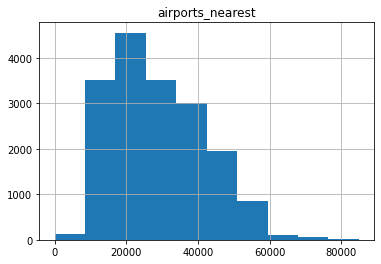

In [78]:
# посмотрим распределение расстояния до аэропорта 
data.hist('airports_nearest', bins = 10)

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

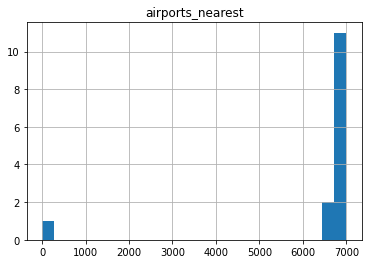

In [79]:
# посмотрим распределение расстояния до аэропорта до 70 км
data.hist('airports_nearest', bins = 25, range = (0, 7000))

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

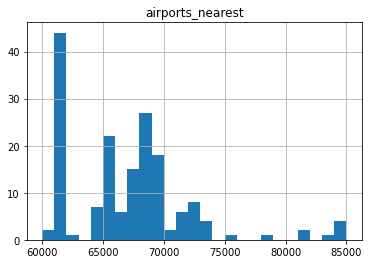

In [80]:
# посмотрим распределение расстояния до аэропорта от 70 км
data.hist('airports_nearest', bins = 25, range = (60000, 85000))

Основная группа от 10 до 50 км до аэропорта. Аномальным значеним считаю только расстояние 0 м до аэропорта, остальные в рамках ожиданий от 6 до 85 км. 

In [81]:
# удалим данные с расстоянием до аэропорта в 0 м
data = data[data['airports_nearest'] != 0]

Заполнять пустые значения вычеслениями может привести к ошибочному анализу, поэтому оставим их. 

In [82]:
# посмотрим расстояние до центра
data['cityCenters_nearest'].describe()

count    17742.000000
mean     14291.391162
std       8596.197722
min        181.000000
25%       9443.250000
50%      13157.000000
75%      16315.750000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

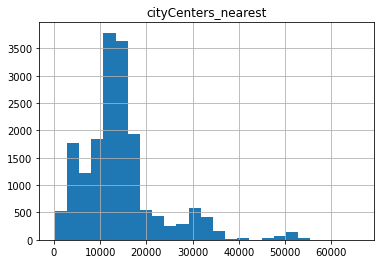

In [83]:
# посмотрим распределение расстояния до центра
data.hist('cityCenters_nearest', bins = 25)

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

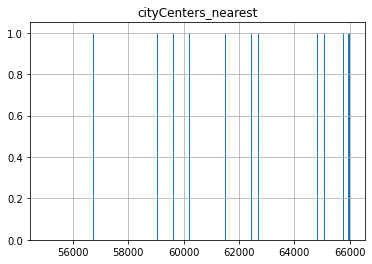

In [84]:
# посмотрим распределение расстояния до центра
data.hist('cityCenters_nearest', bins = 300, range = (55000, 66000))

array([[<AxesSubplot:title={'center':'cityCenters_nearest'}>]],
      dtype=object)

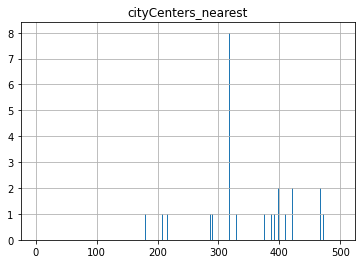

In [85]:
# посмотрим распределение расстояния до центра
data.hist('cityCenters_nearest', bins = 300, range = (0, 500))

Основная группа от 2,5 до 17,5 км до центра. Никаких аномалий по расстоянию от центра не видно, дом может возле самого центра, как и 66 км от него. Удалять не будем. 

In [86]:
data['cityCenters_nearest'].isna().sum()

5431

Заполнять пустые значения вычеслениями может привести к ошибочному анализу, поэтому оставим их. 

In [87]:
# посмотрим кол-во парков
data['parks_around3000'].describe()

count    17743.000000
mean         0.602097
std          0.793063
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [88]:
data.groupby('parks_around3000')['parks_around3000'].count()

parks_around3000
0.0    9921
1.0    5554
2.0    1675
3.0     593
Name: parks_around3000, dtype: int64

Основная группа квартир не имеет рядом парки. Никаких замечаний по кол-ву парков нет, можно проверить только расстояние до парка у всех есть, где есть парк рядом

In [89]:
# кол-во объектов рядом с парками и расстояними до них
data_park = data.pivot_table(index = 'parks_around3000', values = 'parks_nearest', \
                 aggfunc = (lambda x: (x == 0).sum(), lambda x: (x.isna()).sum(), \
                            lambda x: (x > 0).sum(), lambda x: (x > 3000).sum()))
data_park.columns = ['Расстояние = 0', 'Расстояние пустые значения', 'Расстояние > 0', 'Расстояние > 3000']
data_park

,Расстояние = 0,Расстояние пустые значения,Расстояние > 0,Расстояние > 3000
parks_around3000,,,,
0.0,0.0,9917.0,4.0,4.0
1.0,0.0,0.0,5554.0,0.0
2.0,0.0,0.0,1675.0,0.0
3.0,0.0,0.0,593.0,0.0


Никаких аномалий нет, пустые значения заполнять не будем, т.к. может привести к ошбочному анализу. 

In [90]:
# посмотрим расстояние до парков
data['parks_nearest'].describe()

count    7826.000000
mean      491.989267
std       342.466958
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

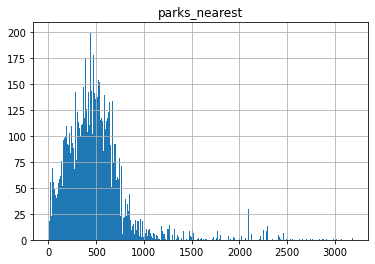

In [91]:
# посмотрим распределение расстояния до парка
data.hist('parks_nearest', bins = 300)

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

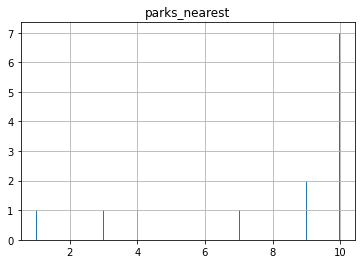

In [92]:
# посмотрим распределение расстояния до парка
data.hist('parks_nearest', bins = 300, range = (1, 10))

Основная группа с парками находится в расстоянии от 250 до 750 м. Аномалий нет, 1 м и 3 м не считаю аномальными, т.к. при выходе из дома может быть парк.
Заменить пустые не возможно. 

In [93]:
# посмотрим по кол-ву водоемов 
data['ponds_around3000'].describe()


count    17743.000000
mean         0.760356
std          0.932964
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [94]:
data.groupby('ponds_around3000')['ponds_around3000'].count()

ponds_around3000
0.0    8932
1.0    5556
2.0    1830
3.0    1425
Name: ponds_around3000, dtype: int64

Основная группа квартир не имеет рядом водоемы. Никаких замечаний по кол-ву водоемов нет, можно проверить только расстояние до водоемов у всех есть, где есть водоем рядом

In [95]:
# посмотрим по расстоянию до водоемов 
data['ponds_nearest'].describe()


count    8811.000000
mean      520.914198
std       277.444735
min        13.000000
25%       298.000000
50%       506.000000
75%       733.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

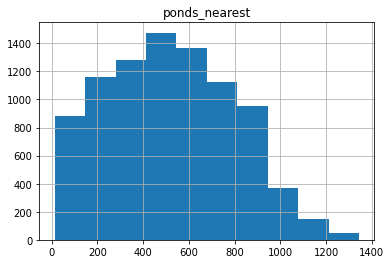

In [96]:
# посмотрим распределение расстояния до парка
data.hist('ponds_nearest', bins = 10)

In [97]:
# кол-во объектов рядом с водоемами и расстояними до них
data_ponds = data.pivot_table(index = 'ponds_around3000', values = 'ponds_nearest', \
                 aggfunc = (lambda x: (x == 0).sum(), lambda x: (x.isna()).sum(), \
                            lambda x: (x > 0).sum(), lambda x: (x > 3000).sum()))
data_ponds.columns = ['Расстояние = 0', 'Расстояние пустые значения', 'Расстояние > 0', 'Расстояние > 3000']
data_ponds

,Расстояние = 0,Расстояние пустые значения,Расстояние > 0,Расстояние > 3000
ponds_around3000,,,,
0.0,0.0,8932.0,0.0,0.0
1.0,0.0,0.0,5556.0,0.0
2.0,0.0,0.0,1830.0,0.0
3.0,0.0,0.0,1425.0,0.0


Основная группа до 900 м до водоема. Никаких аномалий нет. Пустые значения заполнять не будем. 

In [98]:
# рассмотрим столбец сколько дней было размещено объявление (от публикации до снятия)
data['days_exposition'].describe()

count    20070.000000
mean       179.858495
std        218.640376
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

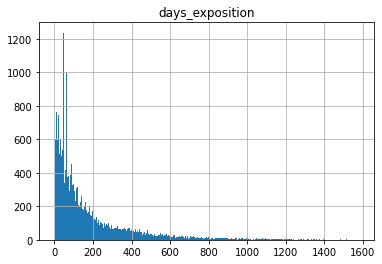

In [99]:
# рассмотрим распределение по days_exposition
data.hist('days_exposition', bins = 300)

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

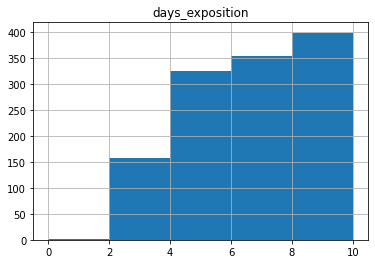

In [100]:
data.hist('days_exposition', bins = 5, range = (0, 10))

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

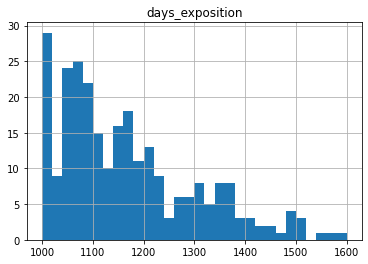

In [101]:
data.hist('days_exposition', bins = 30, range = (1000, 1600))

Основная группа до 200 дней. Аномальными значениями можно считать свыше 4 лет, но так и 3 года можно считать аномальными, поэтому удалять ничего не будем. 
Пустые значения не заполняем, что бы не прийти к ошибочному анализу. 

In [102]:
# проверим на целочисленность столбцов
for col in data.columns:
    a = 0
    if data[col].dtype.name == 'float64':        
        for ind in data[col][~data[col].isna()].unique():
            if int(ind) != ind:
                a +=1
        print('У столбца', col, 'нецелочисленных значений', a)

У столбца total_area нецелочисленных значений 1803
У столбца ceiling_height нецелочисленных значений 150
У столбца floors_total нецелочисленных значений 0
У столбца living_area нецелочисленных значений 1504
У столбца kitchen_area нецелочисленных значений 868
У столбца balcony нецелочисленных значений 0
У столбца airports_nearest нецелочисленных значений 0
У столбца cityCenters_nearest нецелочисленных значений 0
У столбца parks_around3000 нецелочисленных значений 0
У столбца parks_nearest нецелочисленных значений 0
У столбца ponds_around3000 нецелочисленных значений 0
У столбца ponds_nearest нецелочисленных значений 0
У столбца days_exposition нецелочисленных значений 172


Предположение по набору целочисленных значений в столбцах `last_price`, `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` подтвердилось, но есть исключение `days_exposition`. Надо проверить эти данные.

In [103]:
# сделаем список нецелочисленных значений в столбце 'days_exposition'
list_days_exposition_except = []
for ind in data['days_exposition'][~data['days_exposition'].isna()].unique():
    if int(ind) != ind:
        list_days_exposition_except.append(ind)
print(list_days_exposition_except)

[189.00000000000003, 90.00000000000001, 366.00000000000006, 179.00000000000003, 763.0000000000001, 6.000000000000001, 44.00000000000001, 11.000000000000002, 186.00000000000003, 194.00000000000003, 45.00000000000001, 88.00000000000001, 360.00000000000006, 353.00000000000006, 181.00000000000003, 46.00000000000001, 12.000000000000002, 372.00000000000006, 355.00000000000006, 24.000000000000004, 182.00000000000003, 361.00000000000006, 48.00000000000001, 356.00000000000006, 378.00000000000006, 359.00000000000006, 694.0000000000001, 22.000000000000004, 3.0000000000000004, 47.00000000000001, 89.00000000000001, 183.00000000000003, 188.00000000000003, 703.0000000000001, 368.00000000000006, 776.0000000000001, 349.00000000000006, 722.0000000000001, 23.000000000000004, 193.00000000000003, 706.0000000000001, 384.00000000000006, 174.00000000000003, 702.0000000000001, 388.00000000000006, 383.00000000000006, 374.00000000000006, 381.00000000000006, 365.00000000000006, 176.00000000000003, 185.00000000000

У нецелочисленных значений `days_exposition` десятичная часть крайне мала, и скорее всего, вызвана ошибкой вычисления. Поэтому можем ими пренебречь и все значения перевести в целочисленный тип данных.

In [104]:
list_int = ['floors_total', 'balcony', 'airports_nearest', \
            'cityCenters_nearest', 'parks_around3000', 'parks_nearest', \
            'ponds_around3000', 'ponds_nearest', 'days_exposition']
for ind in list_int:
    
    data.loc[~data[ind].isna(), ind] = data.loc[~data[ind].isna(), ind].astype(int)


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23173 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23173 non-null  int64         
 1   last_price            23173 non-null  int64         
 2   total_area            23173 non-null  float64       
 3   first_day_exposition  23173 non-null  datetime64[ns]
 4   rooms                 23173 non-null  int64         
 5   ceiling_height        23173 non-null  float64       
 6   floors_total          23173 non-null  int64         
 7   living_area           21361 non-null  float64       
 8   floor                 23173 non-null  int64         
 9   is_apartment          23173 non-null  bool          
 10  studio                23173 non-null  bool          
 11  open_plan             23173 non-null  bool          
 12  kitchen_area          21043 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [106]:
# Посчитаем цену одного квадратного метра
data['price_m2'] = data['last_price']/data['total_area']

In [107]:
data['price_m2'].describe()

count    23173.000000
mean         0.088346
std          0.043326
min          0.000000
25%          0.065574
50%          0.085227
75%          0.103950
max          0.848485
Name: price_m2, dtype: float64

array([[<AxesSubplot:title={'center':'price_m2'}>]], dtype=object)

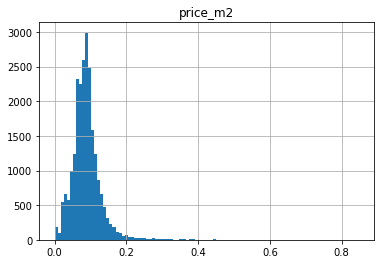

In [108]:
# рассмотрим распределение по price_m2
data.hist('price_m2', bins = 100)

array([[<AxesSubplot:title={'center':'price_m2'}>]], dtype=object)

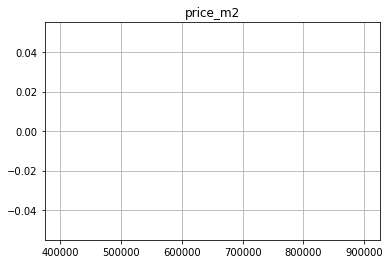

In [109]:
# рассмотрим распределение по price_m2 от 400 т. руб
data.hist('price_m2', bins = 100, range = (400000, 900000))

array([[<AxesSubplot:title={'center':'price_m2'}>]], dtype=object)

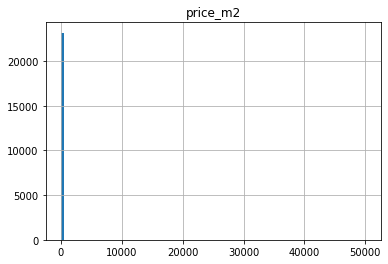

In [110]:
# рассмотрим распределение по price_m2 до 50 т.руб. 
data.hist('price_m2', bins = 100, range = (0, 50000))

Основная группа по цене квадратного метра находится в диапазоне от 50 до 150 т. руб. Крайне привлекательной ценой можно считать до 20 т. руб. и крайне престижной от 400 т. руб.

In [111]:
# создадим новые столбцы месяц, год и день недели `month_exposition`, `year_exposition` и `day_week_exposition`
data['month_exposition'] = data['first_day_exposition'].dt.month #месяц
data['year_exposition'] = data['first_day_exposition'].dt.year #год
data['day_week_exposition'] = data['first_day_exposition'].dt.weekday #день недели

array([[<AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

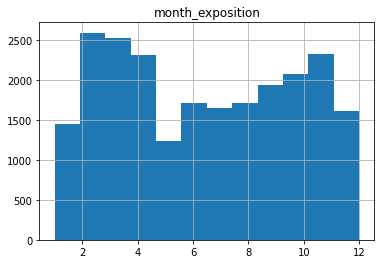

In [112]:
# рассмотрим распределение по month_exposition
data.hist('month_exposition', bins = 12)

array([[<AxesSubplot:title={'center':'month_exposition'}>]], dtype=object)

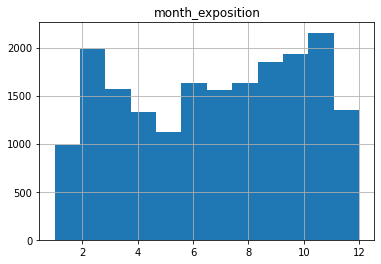

In [113]:
# рассмотрим распределение по month_exposition без укороченых годов 2014 и 2019
data.loc[((data['year_exposition'] > 2015) & (data['year_exposition'] < 2019))].hist('month_exposition', bins = 12)


Массовые предложения в феврале, марте, апреле и ноябре. Минимум предложений в январе, декабре и мае. Скорее всего вызвано массовым отдыхом в зимнее и летнее время.

In [114]:
data['year_exposition'].describe()

count    23173.000000
mean      2017.373193
std          1.035546
min       2014.000000
25%       2017.000000
50%       2017.000000
75%       2018.000000
max       2019.000000
Name: year_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'year_exposition'}>]], dtype=object)

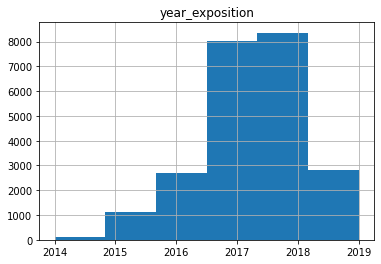

In [115]:
# рассмотрим распределение по year_exposition
data.hist('year_exposition', bins = 6)

Основные размещения были в 17 и 18 годах. Небольшие кол-ва продаж в 2014, 2015 и 2019, но выборка в 14 началась с 27 ноября, а в 19 году закончилась 3 мая. Сложно из-за этого сделать выводы. 14-15 год был кризисным для России, в 16-17 выросли темпы ввода жилья, поэтому выросли предложения. 

array([[<AxesSubplot:title={'center':'day_week_exposition'}>]],
      dtype=object)

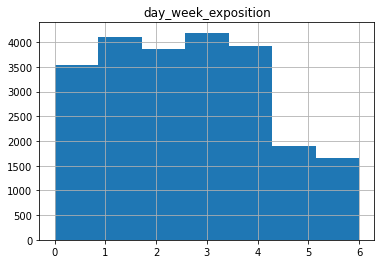

In [116]:
# рассмотрим распределение по month_exposition
data.hist('day_week_exposition', bins = 7)

Основная масса объявлений размещена в будни дни. В выходные падает более чем в 2 раза. 

In [117]:
# создадим новый столбец тип этажа «первый», «последний», «другой» 
# создадим функцию определения типа этажа
def func_type_floor(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
# применим созданную функцию для создания нового столбца
data['type_floor'] = data.apply(func_type_floor, axis = 1)

            last_price
type_floor            
другой           17096
первый            2851
последний         3226


<AxesSubplot:xlabel='type_floor'>

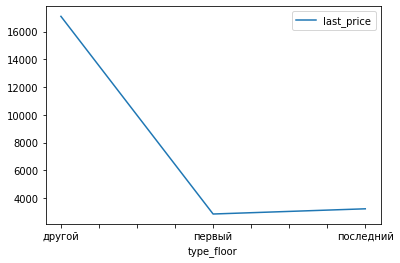

In [118]:
data_price_area = data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc =('count'))
print(data_price_area)
data_price_area.plot()

Предложений по первому и последнему этажу немного, основная часть находится в других типах этажа. 

In [119]:
# переведем расстояние до центра города в километры и округлим
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

array([[<AxesSubplot:title={'center':'cityCenters_nearest_km'}>]],
      dtype=object)

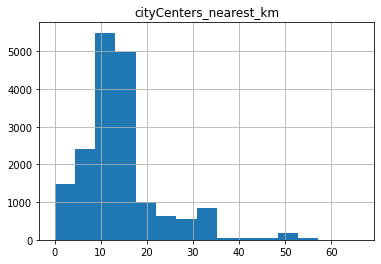

In [120]:
# рассмотрим распределение по cityCenters_nearest
data.hist('cityCenters_nearest_km', bins = 15)

Основная группа предложений до 20 км до центра. 

### Проведите исследовательский анализ данных

In [121]:
# Rак быстро продавались квартиры (столбец days_exposition). 
data['days_exposition'].describe()

count    20070.000000
mean       179.858495
std        218.640376
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

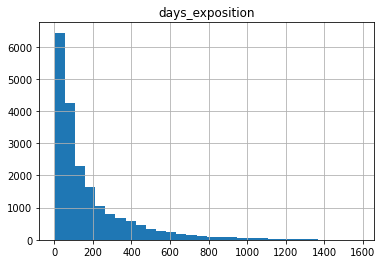

In [122]:
# рассмотрим распределение по days_exposition
data.hist('days_exposition', bins = 30)

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

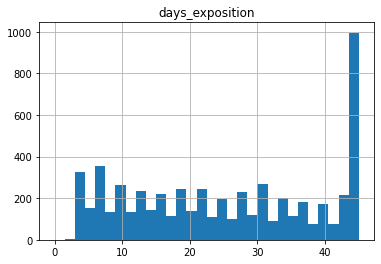

In [123]:
# рассмотрим распределение по days_exposition
data.hist('days_exposition', bins = 30, range = (0, 45))

Среднее значение продажи квартиры 180 дней, хотя медиана равно 95 дней — это вызвано большим разбросом дней продаж. Обычно продажа квартиры занимает 95 дней (медианное значение). Быстрыми продажами можем считать до 45 дней (квантиль 25%) и необычно долгими от 230 дней (квантиль 75%). 


Изучим, зависит ли цена от:
- 	общей площади;
- 	жилой площади;
- 	площади кухни;
- 	количества комнат;
- 	этажа, на котором расположена квартира (первый, последний, другой);
- 	даты размещения (день недели, месяц, год).

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

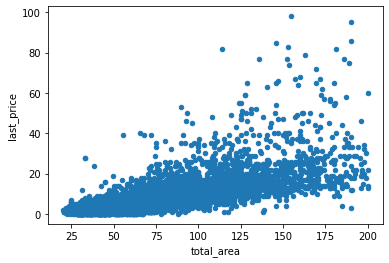

In [124]:
# зависимость цены от общей площади
data.plot(x='total_area', y='last_price', kind='scatter')

<AxesSubplot:xlabel='total_area'>

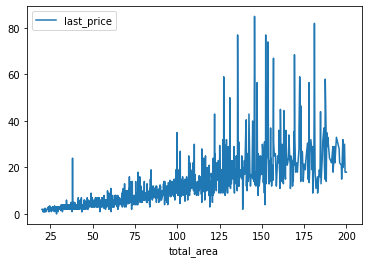

In [125]:
data_price_area = data.pivot_table(index = 'total_area', values = 'last_price', aggfunc =('median'))
data_price_area.plot()

Цена от общей площади зависит. Есть выбросы, т.к. не только общая площадь влияет на цену. 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

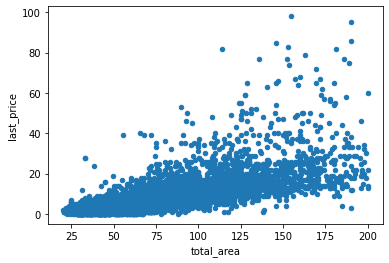

In [126]:
data.plot(x='total_area', y='last_price', kind='scatter')

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

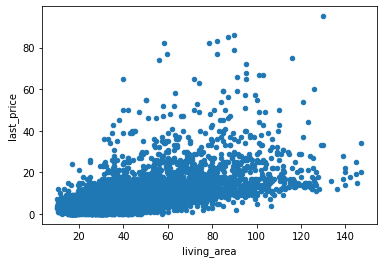

In [127]:
# зависимость цены от жилой площади
data.plot(x='living_area', y='last_price', kind='scatter')

<AxesSubplot:xlabel='living_area'>

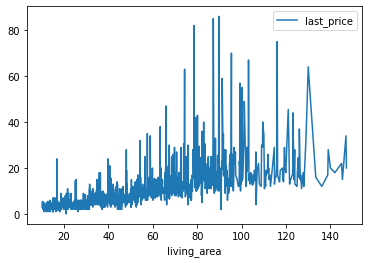

In [128]:
data_price_area = data.pivot_table(index = 'living_area', values = 'last_price', aggfunc =('median'))
data_price_area.plot()

Цена квартиры также зависит от жилой площади, но здесь разбросов больше. Что подтверждает коэффициент корреляции Пирсона.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

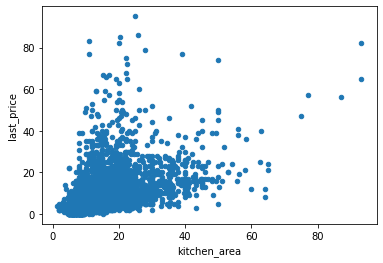

In [129]:
# зависимость цены от площади кухни
data.plot(x='kitchen_area', y='last_price', kind='scatter')

<AxesSubplot:xlabel='kitchen_area'>

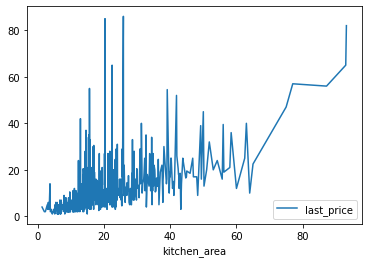

In [130]:
data_price_area = data.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc =('median'))
data_price_area.plot()

Зависимость от площади кухни видим, но разбросов гораздо больше. 

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

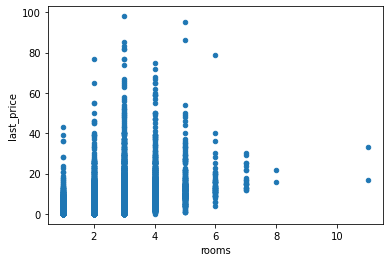

In [131]:
# зависимость цены от кол-ва комнат
data.plot(x='rooms', y='last_price', kind='scatter')

<AxesSubplot:xlabel='rooms'>

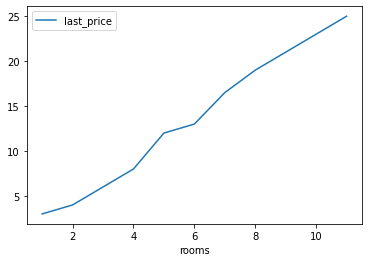

In [132]:
data_price_area = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc =('median'))
data_price_area.plot()

От кол-ва комнат в квартире видна хорошая зависимость медианной цены квартиры.

<AxesSubplot:xlabel='type_floor', ylabel='last_price'>

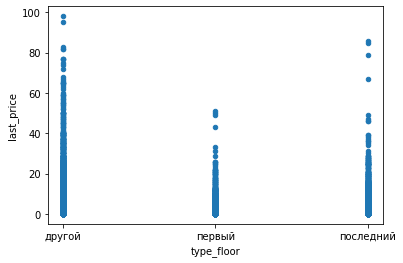

In [133]:
# зависимость цены от типа этажа 
data.plot(x='type_floor', y='last_price', kind='scatter')

<AxesSubplot:xlabel='type_floor'>

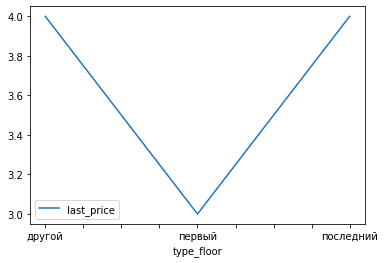

In [134]:
data_price_area = data.pivot_table(index = 'type_floor', values = 'last_price', aggfunc =('median'))
data_price_area.plot()

Квартиры на первом этаже в основном самые дешевые. Квартиры на последнем этаже дороже первого, но дешевле других этажностей квартир. 

<AxesSubplot:xlabel='day_week_exposition', ylabel='last_price'>

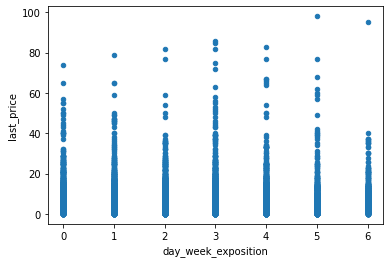

In [135]:
# зависимость цены дня недели
data.plot(x='day_week_exposition', y='last_price', kind='scatter')

<AxesSubplot:xlabel='day_week_exposition'>

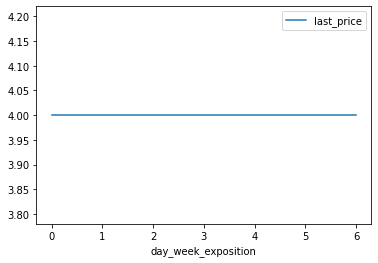

In [136]:
data_price_area = data.pivot_table(index = 'day_week_exposition', values = 'last_price', aggfunc =('median'))
data_price_area.plot()

На графиках видно, что основная масса недорогих квартир размещены в субботу ил воскресенье. Но разброс цен всего в пределах 4%. 

<AxesSubplot:xlabel='month_exposition', ylabel='last_price'>

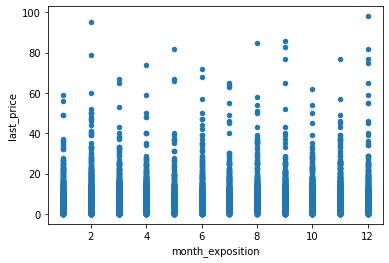

In [137]:
# зависимость цены от месяца 
data.plot(x='month_exposition', y='last_price', kind='scatter')

<AxesSubplot:xlabel='month_exposition'>

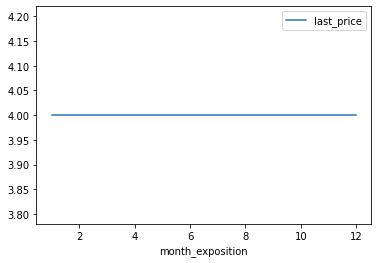

In [138]:
data_price_area = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc =('median'))
data_price_area.plot()

Медийная цена самая низкая в мае и июне, скорее всего связано с временем отпусков и мало кто думает о покупке недвижимости. В остальные месяцы медийная цена 4.55 - 4.75 млн руб. Несмотря на то, что предложений в декабре и январе минимальны, но цены не опускают, т.к. идут хорошие месяца по продажам. 

<AxesSubplot:xlabel='year_exposition', ylabel='last_price'>

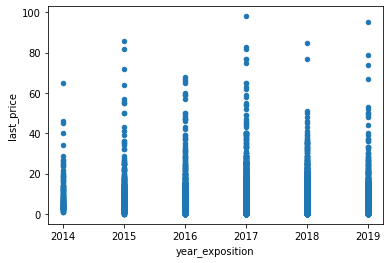

In [139]:
# зависимость цены от общей площади
data.plot(x='year_exposition', y='last_price', kind='scatter')

<AxesSubplot:xlabel='year_exposition'>

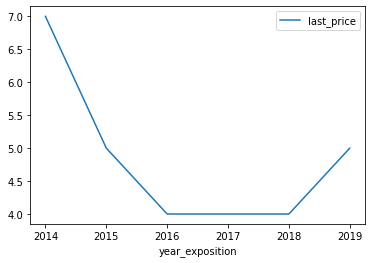

In [140]:
data_price_area = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc =('median'))
data_price_area.plot()

Цены падали с 2014 по 2016 года, затем нормализовалиь и в 2019 пошли вверх. Возможно, что малая выборка по 14 году, но как раз 2014 и 2015 считаются кризисными годами для России, что привело в падению покупательского спроса.  

In [141]:
# Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
data_loc_mean_price = data.pivot_table(index = 'locality_name', values = 'price_m2', \
                 aggfunc = ('count', 'mean')).sort_values('count', ascending = False).head(10)

data_loc_mean_price.columns = ['Кол-во объявлений', 'Средняя цена м2']
data_loc_mean_price['Средняя цена м2'] = data_loc_mean_price['Средняя цена м2'].round(1)
data_loc_mean_price.sort_values('Средняя цена м2', ascending = False)

,Кол-во объявлений,Средняя цена м2
locality_name,,
Санкт-Петербург,15347,0.1
Мурино,581,0.1
Кудрово,467,0.1
посёлок Шушары,437,0.1
Всеволожск,397,0.1
Пушкин,362,0.1
Колпино,337,0.1
посёлок Парголово,326,0.1
Гатчина,307,0.1


Тройка лидеров по высокой стоимости квадратного метра:

| Город           | Средняя цена м2  |
| -------------   | ----------------:|
| Санкт-Петербург | 113078.8         |
| Пушкин | 103075.3 |
| Кудрово |95315.1 |

Тройка лидеров по доступности квадратного метра жилья:

| Город           | Средняя цена м2  |
| -------------   | ----------------:|
| Выборг | 58360.4 |
| Всеволожск | 68719.3 |
| Гатчина | 68757.7 |

<AxesSubplot:xlabel='cityCenters_nearest_km'>

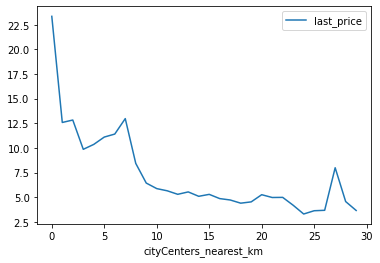

In [142]:
# выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра до центра
data_cent_price = data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index = 'cityCenters_nearest_km', \
                                                             values = 'last_price', aggfunc = ('mean'))
data_cent_price.plot()

Удалённость от центра влияет на его среднюю цену, чем дальше от центра, тем дешевле.
Согласно графика можно сделать заключение, что центр заканчивается радиусом 1 км. Цена свыше сразу упала в 2 раза!

### Общий вывод

Изначально в предоставленной статистике имеем 22 столбца по  23699 строк.
При первом анализе предоставленных данных сделал следующие выводы:
1. Всего 23699 строк, но не во всех столбцах полные значения. Необходимо, проверить пропуски и заполнить или удалить при необходимости.  
2. Тип данных в `last_price`, `floors_total`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` *float64*, хотя все данные целочисленные. Необходимо поменять тип данных на *int*.
3. Тип данных в `is_apartment` *object* должен быть *bool*. Проверить набор данных и поменять тип. 
4. Столбец `rooms` не может быть комнат 0. Проверить в чем причина и исправить при возможности или удалить. 
5. Столбец `first_day_exposition` имеет тип *object*, а должен *datatime*. Необходимо сделать изменения. 
6. Проверить аномальные значения во всех столбцах, кроме `total_images`, т.к. кол-во фото не используются в анализе, и ограничений на поле нет.
7. Явных дубликатов не обнаружено. 

`last_price` 
- данные все заполнены
- основная группа объявлений от 3 до 7 млн. руб. 
- квартиры до 600 т. руб. и свыше 100 млн. руб. посчитал выбросами и удалил их из данных.

`first_day_exposition` 
- все данные заполнены;
- основная группа выделенной нет
- начало выборки 2014-11-27
- окончание 2019-05-03
- выбросов нет, изменений по столбцу не делал.

`rooms` 
- все данные заполнены;
- основная группа находится от 1 до 3 комнат в квартире
- квартиры без комнат и квартиры от 8 комнат посчитал выбросами, квартиры без комнат и менее 36.6 м2 преобразовал в 1 комнату, а остальные удалил из данных.

`ceiling_height`
- не все данные заполнены;
- основная группа высоты потолков находится от 2 до 4 м в квартире
- пустые значения заполним медийными значениями высоты потолков по высотности дома;
- потолки от 20 до 33 м посчитал ошибкой ввода данных и их разделил на 10
- квартиры с потолками до 2 м и выше 5 м посчитал выбросами и удалил их из данных.

`floors_total` 
- не все данные заполнены;
- данные с пустыми значениями удалил, т.к. их мало и этажность используется в анализе, а сделать выводы об этажности из других данных невозможно, 
- основная группа дома до 20 этажей. 
- потолки от 20 до 33 м посчитал ошибкой ввода данных и их разделил на 10
- квартиры с потолками до 2 м и выше 5 м посчитал выбросами и удалил их из данных.

`floor` 	
- все данные заполнены; 
- основная группа квартир находится до 10 этажа включительно;
- квартиры на этажах с 30 являются выбросами, но не удалил их из данных, т.к. уже сделал ограничения по этажности дома.

`is_apartment`
- не все данные заполнены; 
- пустые значения меняю на FALSE, считая, что если не указано, то значит нет. 
- изменения пустых привело к правильному типу данных bool
- основная группа не апартаменты.

`studio`
- все данные заполнены; 
- основная группа не студии.

`open_plan`
- все данные заполнены; 
- основная группа не свободной планировки.

`total_area`
- все данные заполнены;
- основная группа находится от 30 до 80 м2.
- квартиры до 20 м2 и свыше 200 м2 посчитал выбросами и удалил их из данных.

`living_area`
- не все данные заполнены; 
- заполнять пустые не стал, т.к. может привести к ошибочному анализу
- основная группа квартир жилой площадью от 15 до 50 м2
- квартиры до 10 и свыше 150 м2 посчитал выбросами и удалил их из данных

`kitchen_area`
- не все данные заполнены; 
- заполнять пустые не стал, т.к. может привести к ошибочному анализу
- основная группа квартир с кухней площадью от 5 до 16 м2
- выбросов нет.

`balcony`
- не все данные заполнены; 
- пустые значения заполнил нулем, т.к. скорее отсутствие балкона трактовали не заполнять;
- основная группа квартир до 3 балконов;
- выбросов кажутся квартиры от 3 балконов, но их достаточная группа, поэтому оставил без изменений.

`locality_name`
- не все данные заполнены; 
- пустые значения заполнить невозможно, поэтому их удалил из выборки;
- в столбце есть неявные дубликаты:
	- привел дубликаты к одному типу;
	- проверил уникальные значения всего столбца с названиями пунктов;
	- где нашел не стыковки исправил
		- 26 апреля 2019 года посёлок Мурино получил статус города
		- 28 июня 2018 года деревня Кудрово получила статус города
		- в 2017 году деревня Фёдоровское была преобразована в городской посёлок
		- поселка Гарболово нет на картах, но есть деревня
- основная группа квартир расположена в г. Санкт-Петербург;
- выбросов нет.

`airports_nearest`
- не все данные заполнены; 
- пустые значения заполнить невозможно, но так как их много то не удалил из выборки;
- основная группа от 10 до 50 км до аэропорта.
- выброс 0 м до аэропорта удалил из выборки. 

`cityCenters_nearest`
- не все данные заполнены; 
- пустые значения заполнить невозможно, но так как их много то не удалил из выборки;
- основная группа от 2,5 до 17,5 км до центра.
- выброс нет. 

`parks_around3000`
- не все данные есть;
- пустые значения заполнить невозможно, но так как их много то не удалил из выборки;
- основная группа квартир не имеет рядом парки;
- выбросов нет.

- `parks_nearest`
- не все данные заполнены; 
- пустые значения заполнить невозможно, но так как их много то не удалил из выборки;
- основная группа с парками находится в расстоянии от 250 до 750 м
- выбросов нет.

`ponds_around3000` 
- не все данные есть;
- пустые значения заполнить невозможно, но так как их много то не удалил из выборки;
- основная группа квартир не имеет рядом водоемы;
- выбросов нет.

`ponds_nearest`
- не все данные есть;
- пустые значения заполнить невозможно, но так как их много то не удалил из выборки;
- основная группа до 900 м до водоема. 
- выбросов нет. 

`days_exposition`
- не все данные есть;
- пустые значения заполнить невозможно, но так как их много то не удалил из выборки;
- основная группа квартир продается за 200 дней. 
- выбросов нет. 

Проверил свои предположение о целочисленности столбцов `floors_total`, `balcony`, `airports_nearest’, ‘cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition` и изменил тип данных. Где остались пустые, то в info информацию дает о float.

`price_m2`
- добавил новый столбец **цена квадратного метра**, вычисляется цена делится на общую площадь;
- Основная группа по цене квадратного метра находится в диапазоне от 50 до 150 т. руб. Крайне привлекательной ценой можно считать до 20 т. руб. и крайне престижной от 400 т. руб.

`month_exposition`
- добавил новый столбец **месяц размещения**, получил его выделением месяца из datatime
- Массовые предложения в феврале, марте, апреле и ноябре. Минимум предложений в январе, декабре и мае. Скорее всего вызвано массовым отдыхом в зимнее и летнее время.

`year_exposition`
- добавил новый столбец **год размещения**, получил его выделением года из datatime
- основные размещения были в 17 и 18 годах. 
- небольшие кол-ва продаж в 2014, 2015 и 2019, но выборка в 14 началась с 27 ноября, а в 19 году закончилась 3 мая. Сложно из-за этого сделать выводы. 14-15 год был кризисным для России, в 16-17 выросли темпы ввода жилья, поэтому выросли предложения.

`day_week_exposition`
- добавил новый столбец **день недели размещения**, получил его выделением дня недели из datatime
- Основная масса объявлений размещена в будни дни. В выходные падает более чем в 2 раза.

`type_floor`
- добавил новый столбец **тип этажа**: «первый», «последний», «другой»
- Предложений по первому и последнему этажу немного, основная часть находится в других типах этажа.

`cityCenters_nearest_km`
- добавил новый столбец **расстояние в км до центра**, разделил расстояние в м на 1000 и округлил
- Основная группа предложений до 20 км до центра.

Анализ `days_exposition` показал, среднее значение продажи квартиры 180 дней, хотя медиана равно 95 дней — это вызвано большим разбросом дней продаж. Обычно продажа квартиры занимает 95 дней (медианное значение). Быстрыми продажами можем считать до 45 дней (квантиль 25%) и необычно долгими от 230 дней (квантиль 75%).

Анализ зависимости цены от общей площади, жилой площади, площади кухни, количества комнат, типа этажа и даты размещения (день недели, месяц, год) показал:
- `total_area`, `living_area`, `kitchen_area` влияют на цену: чем больше, тем дороже, только `living_area` и `kitchen_area` имеют больше разбросов из-за их второстепенной важности.
-  `rooms` влияет на цену прямопропорционально: больше комнат дороже квартира. 
- `type_floor` показал, что квартиры на первом этаже в основном самые дешевые. Квартиры на последнем этаже дороже первого, но дешевле других этажностей квартир.
- основная масса недорогих квартир размещены в субботу или воскресенье, но разброс цен всего в пределах 4%. Говорить от зависимости цены от дня недели размещения нельзя. 
- `month_exposition` показывает, что медийная цена самая низкая в мае и июне, скорее всего связано с временем отпусков и мало кто думает о покупке недвижимости. В остальные месяцы медийная цена 4.55 - 4.75 млн руб. Несмотря на то, что предложений в декабре и январе минимальны, но цены не опускают, т.к. идут хорошие месяца по продажам.
- `year_exposition` показал, что цены падали с 2014 по 2016 года, затем нормализовались и в 2019 пошли вверх. Возможно, что малая выборка по 14 году, но как раз 2014 и 2015 считаются кризисными годами для России, что привело к падению покупательского спроса, и не забываем, в 17-18 увеличилось кол-во предложений.

Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: 
Тройка лидеров по высокой стоимости квадратного метра:

| Город           | Средняя цена м2  |
| -------------   | ----------------:|
| Санкт-Петербург | 113078.8         |
| Пушкин | 103075.3 |
| Кудрово |95315.1 |

Тройка лидеров по доступности квадратного метра жилья:

| Город           | Средняя цена м2  |
| -------------   | ----------------:|
| Выборг | 58360.4 |
| Всеволожск | 68719.3 |
| Гатчина | 68757.7 |

Вычислили среднюю цену каждого километра до центра Санкт-Петербурга и получили, что удалённость от центра влияет на его среднюю цену, чем дальше от центра, тем дешевле. И центром можно считать расстояние до него менее 1 км, цена за пределы 1 км сразу падает в два раза. 